In [1]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from networkx.algorithms import bipartite
import matplotlib.cm as cm
from community import community_louvain


# Hashtag Networks: Analyzing Twitter Communities Through Hashtag Usage

## Daniel Mortenson 2022

In [2]:
data = pd.read_csv("sent140_train.csv",encoding = "ISO-8859-1")

In [3]:
data.columns = ['i','id','date',"q",'usn','text']
print(data.head())
tweets = data['text']

   i          id                          date         q            usn  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [4]:

yrs = []
date_val = []
for d in tqdm(data['date']):
    curr = 0
    if d[4:7] == 'May':
        curr += 31
    elif d[4:7] == 'Jun':
        curr += 62
    curr += int(d[8:10])
    curr += int(d[11:13])/24
    curr += int(d[14:16])/(24*60)
    curr += int(d[17:19])/(24*60*60)    
    date_val.append(curr)
data['date_val'] = date_val

  0%|          | 0/1599999 [00:00<?, ?it/s]

In [5]:
def extract_hashtags(text):
     
    # initializing hashtag_list variable
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
         
        # checking the first character of every word
        if word[0] == '#':
             
            # adding the word to the hashtag_list
            hashtag_list.append(word)
     
    # printing the hashtag_list
    return hashtag_list

all_hashtags = []
hash_dict = {}
for t in data['text']:
    hashtags = extract_hashtags(t)
    for h in hashtags:
        if h not in all_hashtags:
            hash_dict[h] = 1
            all_hashtags.append(h)
        else:
            hash_dict[h] += 1
        


In [6]:
user_dict = {}
for u,t in zip(data['usn'],data['text']):
    hashtags = extract_hashtags(t)
    if u not in user_dict.keys():
        user_dict[u] = []
    for h in hashtags:
        if h not in user_dict[u]:
            user_dict[u].append(h)

In [7]:
hashtag_dist = []
select_user_dict = {}
for k in user_dict.keys():
    if len(user_dict[k]) > 1:
        select_user_dict[k] = user_dict[k]
        hashtag_dist.append(len(user_dict[k]))

Text(0.5, 1.0, 'Distribution of # of Hashtags \nUsed by each User')

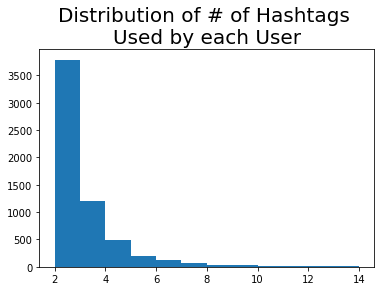

In [8]:
plt.hist(hashtag_dist,bins = [2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.title("Distribution of # of Hashtags \nUsed by each User",size = 20)

In [9]:
G = nx.Graph()
for i,u in enumerate(select_user_dict.keys()):
    G.add_node(u, bipartite = 0)
for i,u in enumerate(select_user_dict.keys()):
    for h in select_user_dict[u]:
        if h in G.edges:
            G.add_edge(u,h)
        else:
            G.add_node(h,bipartite = 1)
            G.add_edge(u,h)

In [10]:
cmap = []
for n in G.nodes(data = True):
    if n[1]['bipartite'] == 0:
        cmap.append('red')
    else:
        cmap.append("blue")
#cmap = ['red' if G[n].is == 0 else 'blue' for n in G.nodes()] #create map

In [11]:
plt.rcParams["figure.figsize"] = (10,10)

pos = nx.spring_layout(G) #get positions


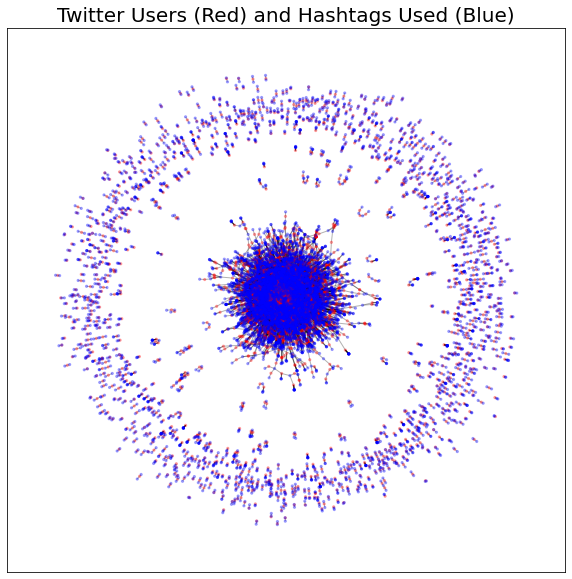

In [12]:
nx.draw_networkx_nodes(G,pos = pos,node_color = cmap,node_size = 5,alpha = .3) #draw colored nodes
nx.draw_networkx_edges(G,pos = pos,alpha = .3) #draw edges
plt.draw() #show plot
plt.title("Twitter Users (Red) and Hashtags Used (Blue)",size = 20); #give it a title

In [13]:
largest_cc = max(nx.connected_components(G), key=len)
CG = G.subgraph(largest_cc)



In [14]:
plt.rcParams["figure.figsize"] = (10,10)

pos = nx.spring_layout(CG) #get positions


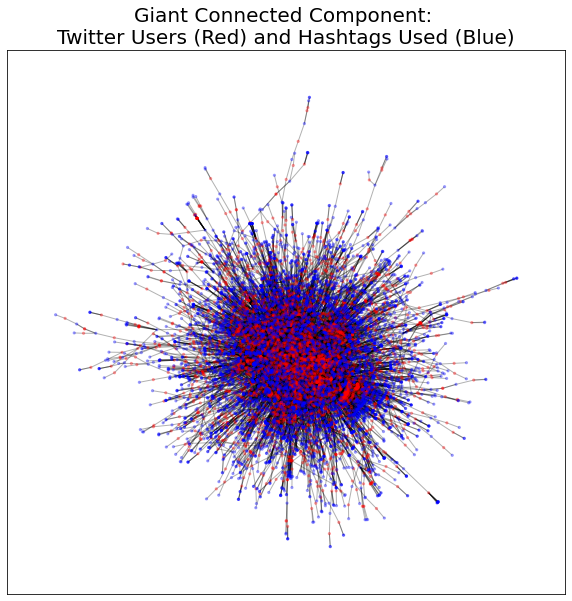

In [15]:
cmap = []
for n in CG.nodes(data = True):
    if n[1]['bipartite'] == 0:
        cmap.append('red')
    else:
        cmap.append("blue")
#cmap = ['red' if G[n].is == 0 else 'blue' for n in G.nodes()] #create map

nx.draw_networkx_nodes(CG,pos = pos,node_color = cmap,node_size = 5,alpha = .3) #draw colored nodes
nx.draw_networkx_edges(CG,pos = pos,alpha = .3) #draw edges
plt.draw() #show plot
plt.title("Giant Connected Component: \nTwitter Users (Red) and Hashtags Used (Blue)",size = 20); #give it a title

True


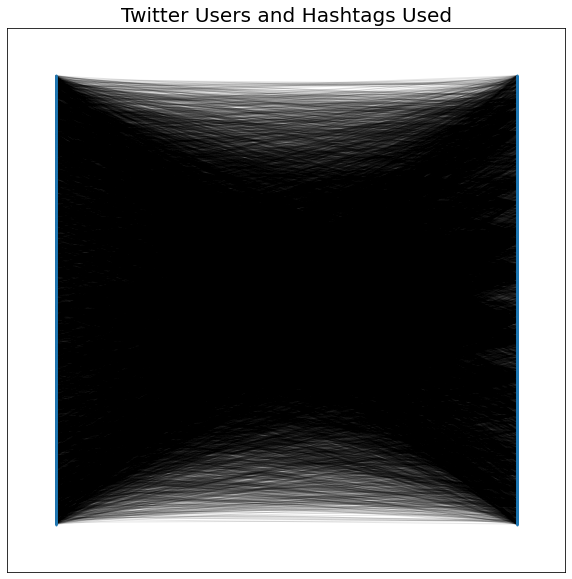

In [16]:
cmap = []
for n in CG.nodes(data = True):
    if n[1]['bipartite'] == 0:
        cmap.append('red')
    else:
        cmap.append("blue")

plt.rcParams["figure.figsize"] = (10,10)

CG = G.subgraph(largest_cc)
print(nx.is_bipartite(CG))
top = nx.bipartite.sets(CG)[0]
pos = nx.bipartite_layout(CG,top) #get positions
nx.draw_networkx_nodes(CG,pos = pos,node_size = 1,alpha = .5) #draw colored nodes
nx.draw_networkx_edges(CG,pos = pos,alpha = .1) #draw edges
plt.draw() #show plot
plt.title("Twitter Users and Hashtags Used",size = 20); #give it a title

In [17]:
print(len(CG.nodes()))
print(len(G.nodes()))

10859
15157


In [18]:
cmap = []
for n in CG.nodes(data = True):
    if n[1]['bipartite'] == 0:
        cmap.append('red')
    else:
        cmap.append("blue")

plt.rcParams["figure.figsize"] = (10,10)



'''pos = nx.spring_layout(CG) #get positions
nx.draw_networkx_nodes(CG,pos = pos,node_color = cmap,node_size = 10,alpha = .5) #draw colored nodes
nx.draw_networkx_edges(CG,pos = pos,alpha = .1) #draw edges
plt.draw() #show plot
plt.title("Twitter Users and Hashtags Used",size = 20); #give it a title'''

'pos = nx.spring_layout(CG) #get positions\nnx.draw_networkx_nodes(CG,pos = pos,node_color = cmap,node_size = 10,alpha = .5) #draw colored nodes\nnx.draw_networkx_edges(CG,pos = pos,alpha = .1) #draw edges\nplt.draw() #show plot\nplt.title("Twitter Users and Hashtags Used",size = 20); #give it a title'

In [19]:
degs = [g[1] for g in list(G.degree())]
sorted_inds = np.argsort(degs)
counts_dict = {}
for i in tqdm(sorted_inds[::-1]):
    if list(G.degree)[i][0][0] == '#':
        counts_dict[list(G.degree)[i][0]] = int(list(G.degree)[i][1])
    #print(list(G.degree)[i])
print(counts_dict)


  0%|          | 0/15157 [00:00<?, ?it/s]

{'#followfriday': 554, '#fail': 174, '#fb': 168, '#FF': 166, '#squarespace': 149, '#FollowFriday': 139, '#ff': 130, '#iranelection': 123, '#1': 103, '#musicmonday': 95, '#': 93, '#iPhone': 85, '#2': 71, '#trackle': 68, '#iphone': 64, '#tcot': 60, '#twitter': 54, '#spymaster': 51, '#f1': 50, '#myweakness': 49, '#followfriday!': 49, '#iremember': 40, '#e3': 39, '#F1': 37, '#music': 37, '#bgt': 37, '#IranElection': 35, '#inaperfectworld': 34, '#haveyouever': 34, '#3': 33, '#chuckmemondays': 31, '#E3': 31, '#3hotwords': 30, '#apple': 29, '#marsiscoming': 28, '#140conf': 28, '#chuck': 28, '#tweetdeck': 27, '#goodsex': 27, '#apprentice': 26, '#followfriday.': 25, '#follow': 23, '#gr88': 22, '#dontyouhate': 22, '#FAIL': 22, '#PakCricket': 22, '#BGT': 22, '#iran': 22, '#eu09': 21, '#wordpress': 21, '#t20': 20, '#4': 20, '#bing': 20, '#3turnoffwords': 20, '#google': 19, '#Twitter': 19, '#mmwanted': 19, '#tehran': 18, '#php': 18, '#fixreplies': 17, '#asot400': 17, '#bb10': 17, '#cricket': 16, '#

Text(0.5, 0, 'Node Degree')

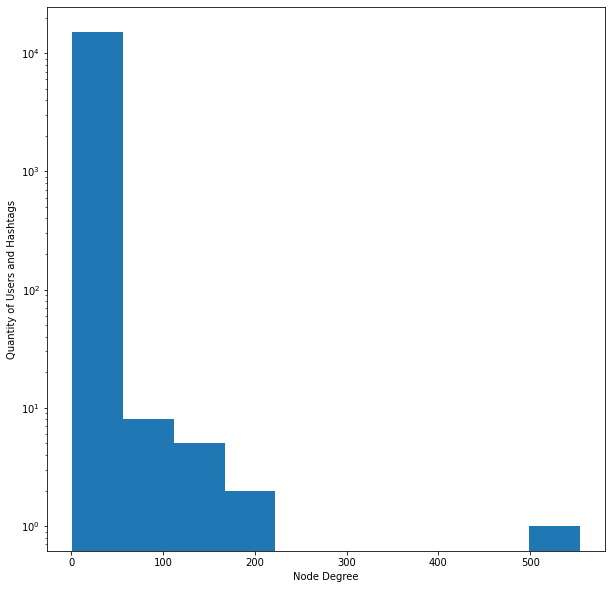

In [20]:
plt.hist(degs)
plt.yscale("log") 
plt.ylabel("Quantity of Users and Hashtags")
plt.xlabel("Node Degree")

In [21]:
hash_inds = []
cg_keys = list(CG.nodes())
for i,n in enumerate(CG.nodes(data = True)):
    if n[1]['bipartite'] == 1:
        hash_inds.append(cg_keys[i])

In [22]:
H = bipartite.weighted_projected_graph(CG,hash_inds)
to_remove = []
for n in H.nodes():
    if counts_dict[n] < 5:
        to_remove.append(n)
for i in range(len(to_remove)):
    H.remove_node(to_remove[i])
    
largest_cc = max(nx.connected_components(H), key=len)
H = H.subgraph(largest_cc)
print(len(H.nodes()))

375


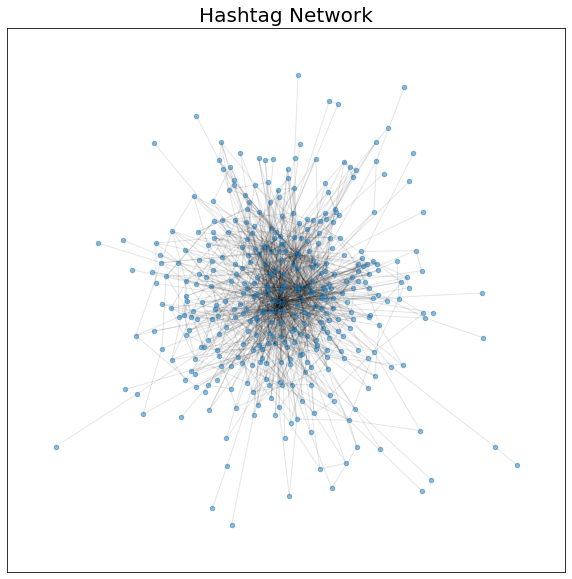

In [23]:
pos = nx.spring_layout(H) #get positions
nx.draw_networkx_nodes(H,pos = pos,node_size = 20,alpha = .5) #draw colored nodes
nx.draw_networkx_edges(H,pos = pos,alpha = .1) #draw edges
plt.draw() #show plot
plt.title("Hashtag Network",size = 20); #give it a title

In [24]:
partition = community_louvain.best_partition(H) 
n_communities = max(partition.values())+1
print(n_communities, "communities detected")


14 communities detected


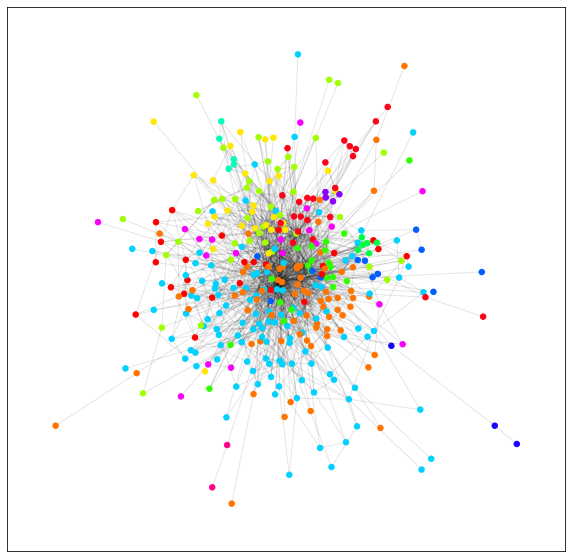

In [25]:
cmap = cm.get_cmap('hsv',n_communities) #outer colormap
nx.draw_networkx_nodes(H, pos, partition.keys(), node_size=30,
                       cmap=cmap, node_color=list(partition.values())) #draw outer node colors first
nx.draw_networkx_edges(H,pos = pos,alpha = .1) #draw edges
#plt.title(f"{n_communities} Communities of Hashtags\n Found with the Louvain Method", size = 20)


In [26]:
classes = {}
print(len(H.nodes()))
print(len(partition.values()))
for n, p in zip(H.nodes(),partition.values()):
    #print(p)
    if int(p) in classes.keys():
        classes[int(p)].append(n)
    else:
        classes[int(p)] =[n]
print(np.unique(partition.values()))

375
375
[dict_values([0, 0, 1, 2, 3, 3, 2, 4, 13, 1, 1, 1, 1, 2, 2, 2, 6, 7, 7, 3, 1, 1, 1, 7, 3, 0, 1, 7, 7, 7, 0, 3, 7, 4, 4, 1, 7, 1, 8, 8, 2, 1, 7, 7, 2, 1, 9, 1, 7, 1, 10, 1, 7, 7, 4, 7, 1, 7, 11, 7, 3, 7, 7, 11, 11, 7, 1, 13, 13, 13, 2, 3, 3, 7, 7, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 0, 2, 1, 7, 1, 1, 1, 7, 7, 0, 0, 0, 0, 3, 7, 13, 11, 1, 1, 7, 1, 0, 7, 7, 7, 7, 7, 2, 7, 7, 8, 7, 1, 7, 7, 11, 4, 0, 0, 13, 13, 13, 0, 1, 8, 8, 7, 7, 7, 0, 0, 1, 13, 3, 12, 12, 2, 4, 7, 9, 9, 13, 4, 7, 7, 4, 10, 13, 3, 3, 7, 2, 2, 7, 1, 1, 2, 7, 1, 7, 1, 7, 7, 7, 7, 4, 0, 0, 3, 2, 3, 11, 7, 4, 0, 1, 11, 13, 7, 11, 3, 11, 3, 8, 0, 13, 1, 3, 1, 5, 5, 5, 5, 5, 3, 7, 7, 7, 8, 2, 3, 7, 13, 2, 7, 7, 7, 7, 1, 7, 2, 0, 0, 2, 11, 7, 1, 1, 3, 7, 13, 1, 1, 2, 7, 11, 13, 3, 3, 3, 7, 7, 1, 8, 4, 13, 7, 7, 1, 1, 8, 7, 13, 7, 4, 4, 1, 7, 7, 7, 7, 7, 3, 3, 7, 11, 7, 2, 1, 7, 7, 1, 0, 11, 7, 7, 7, 3, 7, 7, 2, 7, 5, 6, 6, 6, 10, 4, 1, 10, 7, 11, 8, 7, 1, 7, 2, 1, 1, 7, 13, 3, 3, 3, 4, 7, 7, 1, 7, 1, 1, 13, 7, 11, 7, 6

In [27]:
for k in range(len(list(classes.keys()))):
    print(len(classes[k]))
    print(classes[k],end='\n\n')

25
['#f1', '#nba', '#F1', '#maxout', '#PakCricket', '#StarTrek', '#UP', '#Lakers', '#NBA', '#formula1', '#lakers', '#magic', '#blogchat', '#cricket', '#redwings', '#Followfriday', '#t20', '#pakcricket', '#Canucks', '#hashtags', '#sytycd', '#pakistan', '#canucks', '#Magic', '#T20']

70
['#FollowFriday.', '#followfriday,', '#followfriday', '#Otalia', '#otalia', '#FF', '#doctorwho', '#Dollhouse', '#140conf', '#followfriday!', '#fb', '#le09', '#FF!', '#glasto', '#bgt', '#BB10', '#twitterfail', '#barcamphanoi', '#ff.', '#ff', '#maternalhealth', '#apprentice', '#FollowFriday', '#charitytuesday', '#followfriday.', '#quote', '#readathon', '#spymaster', '#fixreplies', '#MrTweet', '#mallu', '#spymaster.', '#SanctuarySunday', '#FF.', '#BGT', '#Sims3', '#NASCAR', '#work', '#samesexsunday', '#Eric', '#eric', '#ignitephx', '#Follow', '#follow', '#FollowFriday!', '#pawpawty', '#TwitterTakeover', '#Firefox', '#javaone', '#travel', '#followFriday', '#eu09', '#FB', '#harpersglobe', '#vegas', '#140conf.'

# 

In [28]:
hash_community_dict = {}
for k in range(len(list(classes.keys()))):
    for h in classes[k]:
        hash_community_dict[h] = k


user_community_dict = {}
for u in list(user_dict.keys()):
    user_community_dict[u] = []
    for h in user_dict[u]:
        if h in hash_community_dict.keys():
            user_community_dict[u].append(hash_community_dict[h])

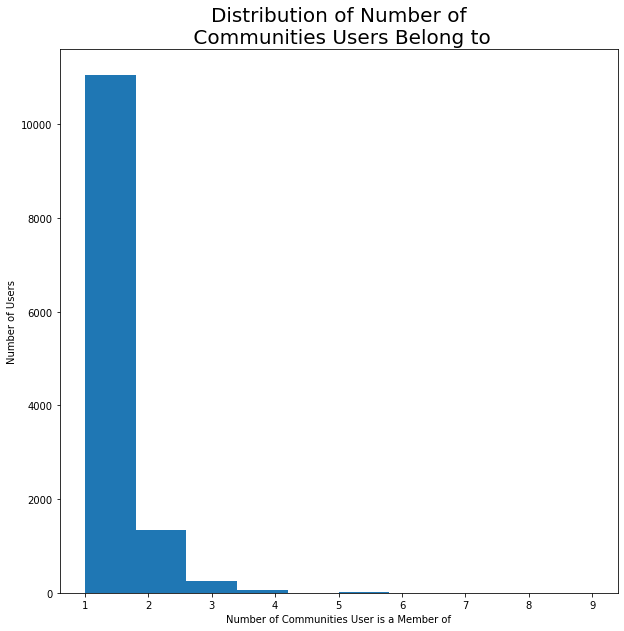

In [131]:
tot = 0
count = 0
n_communities = []
community_memberships = np.zeros((15,))
for u in user_community_dict:
    tot +=1 
    if len(user_community_dict[u]) > 0:
        count += 1
        n_communities.append(len(user_community_dict[u]))
        for c in user_community_dict[u]:
            community_memberships[c] += 1
plt.hist(n_communities)

community_size = []
for k in range(len(list(classes.keys()))):
    community_size.append(len(classes[k]))
#plt.yscale("log")
plt.xlabel("Number of Communities User is a Member of")
plt.ylabel("Number of Users")
plt.title("Distribution of Number of\n Communities Users Belong to",size = 20);

[ 745.  215. 3767. 1637. 2158.]


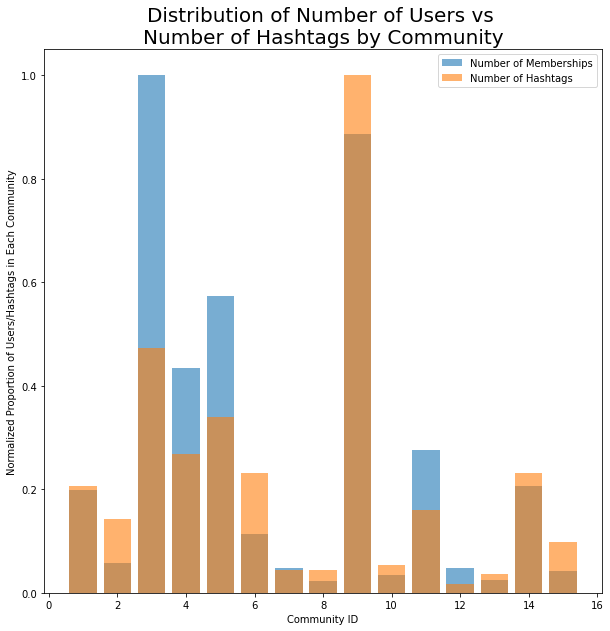

In [145]:
plt.bar(range(1,16),community_memberships/max(community_memberships),alpha =.6,label = "Number of Memberships")
plt.bar(range(1,16),np.array(community_size)/max(community_size),alpha = .6, label = "Number of Hashtags")
print(community_memberships[:5])
#plt.yscale("log")
plt.xlabel("Community ID")
plt.ylabel("Normalized Proportion of Users/Hashtags in Each Community")
plt.legend()
plt.title("Distribution of Number of Users vs \nNumber of Hashtags by Community",size = 20);